In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
atl = "../AQI CSV Files/hotlanta.csv"
atl = pd.read_csv(atl, delimiter=", ")

C:\Users\a_mcr\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [57]:
# Check for null values in atlanta pm25 dataframe
# atl.isnull().sum() # atl.info()

# drop 83 rows with null values found in pm25
atl_no_nulls = atl.dropna(subset=["pm25"])
atl_rename = atl_no_nulls.rename(columns={"date":"Date","pm25":"PM2.5"})
atl_clean = atl_rename.drop(columns=["pm10","o3","no2", "so2","co"])
atl_clean

,Date,PM2.5
0,2020/7/2,29.0
1,2020/7/3,34.0
2,2020/7/4,51.0
3,2020/7/5,72.0
4,2020/7/6,82.0
...,...,...
2246,2014/3/28,59.0
2247,2014/3/29,30.0
2248,2014/3/30,9.0
2249,2014/3/31,29.0


In [58]:
atl_clean[["Year","Month","Day"]] = atl_clean.loc[:,"Date"].str.split("/", n = 2, expand = True) 
atl_clean.drop(columns =["Date"], inplace = True) 
atl_drop = atl_clean
atl_drop

,PM2.5,Year,Month,Day
0,29.0,2020,7,2
1,34.0,2020,7,3
2,51.0,2020,7,4
3,72.0,2020,7,5
4,82.0,2020,7,6
...,...,...,...,...
2246,59.0,2014,3,28
2247,30.0,2014,3,29
2248,9.0,2014,3,30
2249,29.0,2014,3,31


In [59]:
atl_drop["Year"] = atl_drop["Year"].astype(int)
atl_drop["Month"] = atl_drop["Month"].astype(int)
# miami_clean = miami_clean[miami_clean["Year"]>2017]
atl_drop = atl_drop[atl_drop["Month"]<8]
# miami_clean.groupby("Year").count()
atl_cleaner = atl_drop
atl_cleaner

,PM2.5,Year,Month,Day
0,29.0,2020,7,2
1,34.0,2020,7,3
2,51.0,2020,7,4
3,72.0,2020,7,5
4,82.0,2020,7,6
...,...,...,...,...
2246,59.0,2014,3,28
2247,30.0,2014,3,29
2248,9.0,2014,3,30
2249,29.0,2014,3,31


In [60]:
atl_reduced = atl_cleaner[["Year", "Month", "Day", "PM2.5"]]
atl_sorted = atl_reduced.sort_values(by=["Year","Month"], ascending=False)
atl_sorted

,Year,Month,Day,PM2.5
0,2020,7,2,29.0
1,2020,7,3,34.0
2,2020,7,4,51.0
3,2020,7,5,72.0
4,2020,7,6,82.0
...,...,...,...,...
2190,2014,1,27,38.0
2191,2014,1,28,47.0
2192,2014,1,29,38.0
2193,2014,1,30,51.0


In [61]:
AQI = []
for value in atl_sorted["PM2.5"]:
    if value >= 0 and value <= 12:
        AQI.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI.append("invalid")
AQI = [round(i,1) for i in AQI]
atl_sorted["AQI"] = AQI
atl_sorted

,Year,Month,Day,PM2.5,AQI
0,2020,7,2,29.0,86.5
1,2020,7,3,34.0,97.1
2,2020,7,4,51.0,139.2
3,2020,7,5,72.0,159.5
4,2020,7,6,82.0,164.7
...,...,...,...,...,...
2190,2014,1,27,38.0,107.2
2191,2014,1,28,47.0,129.3
2192,2014,1,29,38.0,107.2
2193,2014,1,30,51.0,139.2


In [69]:
# groupby year and month, get a values count to see if any months/year have a lot of missing days
# atl_sorted.groupby(["Year","Month"]).count()

In [70]:
# Create bins, cast min and max AQI for preview of bin range
# new_delhi["AQI"].describe()

bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups", "Unhealthy","Very Unhealthy","Hazardous"]

# place the data series into a new column inside of the DataFrame
atl_sorted["Levels of Concern"]=pd.cut(atl_sorted["AQI"], bins, labels=quality, include_lowest=True)
atl_bin = atl_sorted
atl_bin

,Year,Month,Day,PM2.5,AQI,Levels of Concern
0,2020,7,2,29.0,86.5,Moderate
1,2020,7,3,34.0,97.1,Moderate
2,2020,7,4,51.0,139.2,Unhealthy for Sensitive Groups
3,2020,7,5,72.0,159.5,Unhealthy
4,2020,7,6,82.0,164.7,Unhealthy
...,...,...,...,...,...,...
2190,2014,1,27,38.0,107.2,Unhealthy for Sensitive Groups
2191,2014,1,28,47.0,129.3,Unhealthy for Sensitive Groups
2192,2014,1,29,38.0,107.2,Unhealthy for Sensitive Groups
2193,2014,1,30,51.0,139.2,Unhealthy for Sensitive Groups


In [72]:
# Create bins for Daily AQI Color

bins = [0,50,100,150,200,300,500]
colors = ["Green","Yellow","Orange", "Red","Purple","Maroon"]

# place the data series into a new column inside of the DataFrame
atl_bin["Daily AQI Color"]=pd.cut(atl_bin["AQI"], bins, labels=colors, include_lowest=True)
atl_bins = atl_bin
atl_bins

,Year,Month,Day,PM2.5,AQI,Levels of Concern,Daily AQI Color
0,2020,7,2,29.0,86.5,Moderate,Yellow
1,2020,7,3,34.0,97.1,Moderate,Yellow
2,2020,7,4,51.0,139.2,Unhealthy for Sensitive Groups,Orange
3,2020,7,5,72.0,159.5,Unhealthy,Red
4,2020,7,6,82.0,164.7,Unhealthy,Red
...,...,...,...,...,...,...,...
2190,2014,1,27,38.0,107.2,Unhealthy for Sensitive Groups,Orange
2191,2014,1,28,47.0,129.3,Unhealthy for Sensitive Groups,Orange
2192,2014,1,29,38.0,107.2,Unhealthy for Sensitive Groups,Orange
2193,2014,1,30,51.0,139.2,Unhealthy for Sensitive Groups,Orange


In [75]:
atl_agg = atl_bins.groupby(["Year","Month"]).agg({"AQI":["mean","min","max"]})
atl_months = atl_agg.rename({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6:"June", 7:"Jul"}, axis='index')
atl_months

AQI             
                  mean   min    max
Year Month                         
2014 Jan    113.856000  67.6  159.0
     Feb    114.053846  41.7  161.1
     Mar    118.682759  33.3  159.5
     Apr    108.592000  16.7  153.8
     May    111.446154  50.0  152.3
     June   114.000000  65.5  157.4
     Jul    108.482609  65.5  165.2
2015 Jan    123.370370  67.6  159.5
     Feb    123.353571  78.1  153.8
     Mar    104.796552  63.4  152.3
     Apr     87.074074  20.8  144.1
     May    130.410714  84.4  156.4
     June   139.303333  90.7  172.4
     Jul    139.883871  82.3  170.9
2016 Jan    130.158621  80.2  161.6
     Feb    124.422222  65.5  155.9
     Mar    130.182143  86.5  157.4
     Apr    120.653333  69.7  156.4
     May    101.316129  55.0  155.9
     June   108.460000  29.2  153.3
     Jul    131.203226  69.7  164.7
2017 Jan    117.553846  33.3  159.0
     Feb     91.617391  41.7  144.1
     Mar     89.763333  45.8  151.3
     Apr     79.685185  37.5  129.3
     May     57.441379  20.8  114.5
     June    86.779310  29.2  134.2
     Jul    110.832258  71.8  158.5
2018 Jan    114.137037  65.5  158.5
     Feb     98.996429  52.9  151.8
     Mar    112.558065  57.1  156.4
     Apr     99.193333  52.9  158.0
     May    106.522581  57.1  157.4
     June   111.110714  76.0  152.3
     Jul    108.203226  76.0  151.8
2019 Jan    100.793333  50.0  155.4
     Feb     98.089286  45.8  153.3
     Mar    108.690323  63.4  162.6
     Apr     99.846667  52.9  156.4
     May    124.770000  63.4  154.9
     June   108.937931  73.9  158.5
     Jul    115.161290  71.8  151.8
2020 Jan     86.896667  57.1  129.3
     Feb     88.962069  50.0  126.9
     Mar    107.370968  63.4  156.4
     Apr     95.640000  52.9  161.1
     May     86.729032  41.7  129.3
     June   103.450000  50.0  165.2
     Jul    102.139286  65.5  164.7

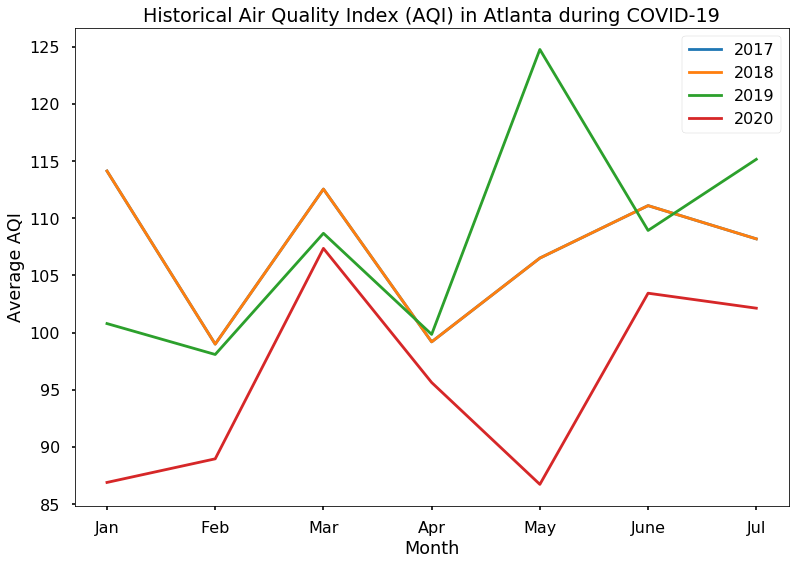

In [77]:
plt.style.use('seaborn-poster')
atl_months["AQI"]["mean"].loc[2018].plot.line(label=2017)
atl_months["AQI"]["mean"].loc[2018].plot.line(label=2018)
atl_months["AQI"]["mean"].loc[2019].plot.line(label=2019)
atl_months["AQI"]["mean"].loc[2020].plot.line(label=2020)
plt.title("Historical Air Quality Index (AQI) in Atlanta during COVID-19")
plt.ylabel("Average AQI")
plt.legend()
plt.show()